## Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Data Load

In [104]:
df = pd.read_csv('/content/customer_churn_data_new.csv')

In [105]:
df

,Age,Gender,Monthly_UsageHours,Num_Transactions,Subscription_Type,Complaints,Churn
0,56,Male,171.2,16,Basic,4,0
1,69,Male,11.9,1,Gold,2,0
2,46,Female,69.2,45,Premium,5,1
3,32,Female,186.7,21,Basic,5,1
4,60,Female,148.4,30,Premium,7,0
...,...,...,...,...,...,...,...
995,25,Female,160.7,26,Gold,3,0
996,66,Male,193.7,49,Premium,6,0
997,52,Male,172.1,50,Gold,10,1
998,69,Male,27.9,5,Premium,6,0


In [106]:
df = pd.get_dummies(df)
df

,Age,Monthly_UsageHours,Num_Transactions,Complaints,Churn,Gender_Female,Gender_Male,Subscription_Type_Basic,Subscription_Type_Gold,Subscription_Type_Premium
0,56,171.2,16,4,0,False,True,True,False,False
1,69,11.9,1,2,0,False,True,False,True,False
2,46,69.2,45,5,1,True,False,False,False,True
3,32,186.7,21,5,1,True,False,True,False,False
4,60,148.4,30,7,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
995,25,160.7,26,3,0,True,False,False,True,False
996,66,193.7,49,6,0,False,True,False,False,True
997,52,172.1,50,10,1,False,True,False,True,False
998,69,27.9,5,6,0,False,True,False,False,True


In [107]:
df.isna().any()

,0
Age,False
Monthly_UsageHours,False
Num_Transactions,False
Complaints,False
Churn,False
Gender_Female,False
Gender_Male,False
Subscription_Type_Basic,False
Subscription_Type_Gold,False
Subscription_Type_Premium,False


In [108]:
df = df.astype(int)

In [109]:
df.dtypes

,0
Age,int64
Monthly_UsageHours,int64
Num_Transactions,int64
Complaints,int64
Churn,int64
Gender_Female,int64
Gender_Male,int64
Subscription_Type_Basic,int64
Subscription_Type_Gold,int64
Subscription_Type_Premium,int64


In [110]:
df

,Age,Monthly_UsageHours,Num_Transactions,Complaints,Churn,Gender_Female,Gender_Male,Subscription_Type_Basic,Subscription_Type_Gold,Subscription_Type_Premium
0,56,171,16,4,0,0,1,1,0,0
1,69,11,1,2,0,0,1,0,1,0
2,46,69,45,5,1,1,0,0,0,1
3,32,186,21,5,1,1,0,1,0,0
4,60,148,30,7,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,25,160,26,3,0,1,0,0,1,0
996,66,193,49,6,0,0,1,0,0,1
997,52,172,50,10,1,0,1,0,1,0
998,69,27,5,6,0,0,1,0,0,1


In [111]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

## Train_Test_Split

In [112]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

## Standardization

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()

In [115]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [116]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, class_weight='balanced')
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [127]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72       139
           1       0.45      0.67      0.54        61

    accuracy                           0.65       200
   macro avg       0.63      0.66      0.63       200
weighted avg       0.70      0.65      0.66       200

ROC-AUC: 0.7276801509611983


In [128]:
confusion_matrix(y_test, y_pred_lr)

array([[89, 50],
       [20, 41]])

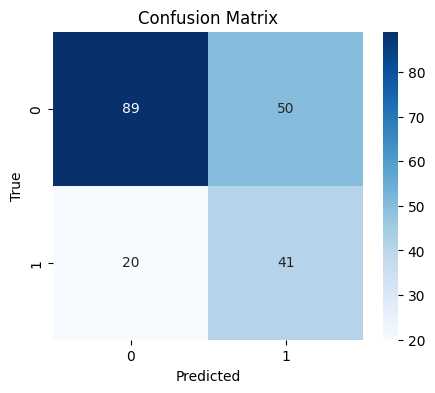

In [129]:
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [131]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       139
           1       0.56      0.38      0.45        61

    accuracy                           0.72       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.70       200

ROC-AUC: 0.7372331642882415


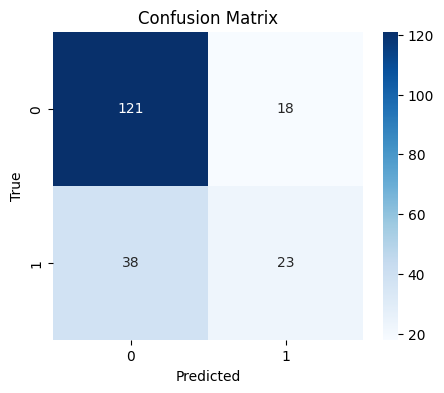

In [132]:
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## AUC-ROC Curve

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

## Random Forest

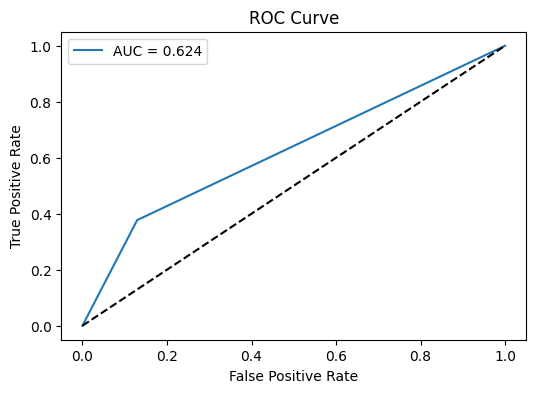

In [138]:
# Probabilities (use [:,1] for the positive class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

auc_score = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')  # diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Logistic Regression

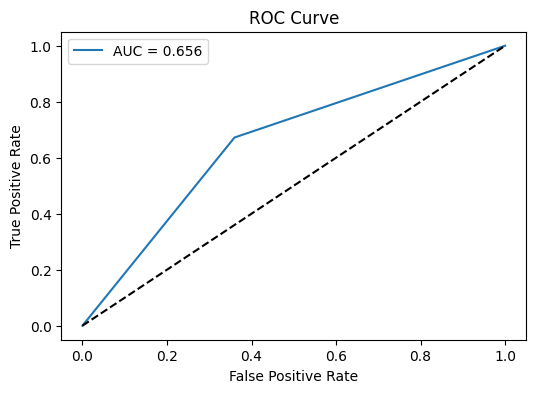

In [135]:
# Probabilities (use [:,1] for the positive class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

auc_score = roc_auc_score(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')  # diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()